<a href="https://colab.research.google.com/github/shineloveyc/Doing_ML/blob/master/PyTorch_NN_basic_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Function

In [0]:
#implement a basic perceptron in Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import os
from pathlib import Path
import pandas as pd
import collections
import string
import json
from collections import Counter
import numpy as np
import re
from argparse import Namespace
from tqdm import tqdm_notebook

In [0]:
#take a srbitary number of input, does the affine transform, applies the activation function and produc a single output
class Perceptron(nn.Module):
  """a perceptron is one linear layer"""
  def __init__(self, input_dim):
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim,1)
  
  def forward(self, x_in):
    """ The forward pass of the perceptron
    Args:
      x_in(torch.tensor): an input data tensor
        x_in.shape should be (batch, num_features)
      Returns:
        the result tensor shape should be (batch, )
      """
    return torch.sigmoid(self.fc1(x_in)).sequeeze()

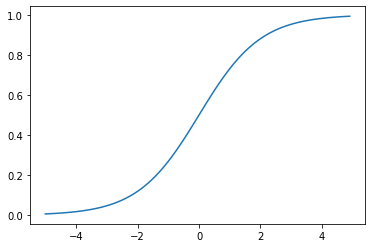

In [128]:
#signmoid function
"""It takes any real value and squashes it into the range between 0 and 1."""
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y= torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

As you can observe from the plot, the sigmoid function saturates (i.e., produces
extreme valued outputs) very quickly and for a majority of the inputs. This can
become a problem because it can lead to the gradients becoming either zero or
diverging to an overflowing floating-point value. These phenomena are also
known as vanishing gradient problem and exploding gradient problem.

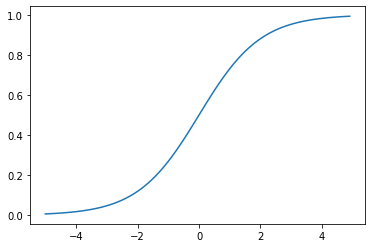

In [129]:
#Tanh
"""Notice that tanh, like the sigmoid, is also a
“squashing” function, except that it maps the set of real values from (–∞, +∞) to
the range [-1, +1]"""
y_tah = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

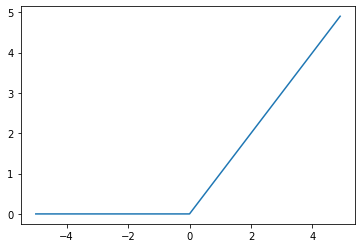

In [130]:
#relu
y_relu = torch.relu(x)

plt.plot(x.numpy(), y_relu.numpy())
plt.show()

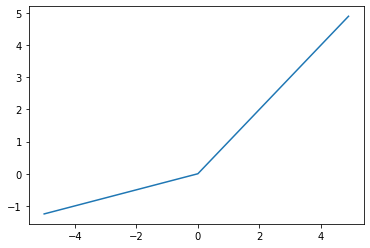

In [131]:
#leaky relu
"""To mitigate that effect, variants such as the Leaky ReLU and Parametric ReLU
(PReLU) activation functions have proposed, where the leak coefficient a is a
learned parameter
"""
prelu = torch.nn.PReLU(num_parameters=1)

y_prelu = prelu(x)

plt.plot(x.numpy(), y_prelu.detach().numpy())
plt.show()

In [132]:
#Softmax
"""Another choice for the activation function is the softmax. Like the sigmoid
function, the softmax function squashes the output of each unit to be between 0
and 1, as shown in Example 3-6. However, the softmax operation also divides
each output by the sum of all the outputs, which gives us a discrete probability
distribution over k possible classes:
"""
softmax = nn.Softmax(dim =1)

x_input = torch.randn(1, 3)

y_output = softmax(x_input)

print(x_input)

print(y_output)

tensor([[ 0.0860, -1.3576, -0.0027]])
tensor([[0.4649, 0.1097, 0.4254]])


# Loss Function

In [133]:
#RMSE/MSE for regular regression
mse_loss = nn.MSELoss()

#predict
output = torch.randn(3, 5, requires_grad=True)

#real label
targets = torch.randn(3, 5)

#calculate loss
loss = mse_loss(output, targets)
print(loss)

tensor(1.1700, grad_fn=<MseLossBackward>)


In [134]:
#category cross-entropy loss
"""The categorical cross-entropy loss is typically used in a multiclass classification
setting in which the outputs are interpreted as predictions of class membership
probabilities. The target (y) is a vector of n elements that represents the true
multinomial distribution over all the classes. If only one class is correct, this
vector is a one-hot vector. The network’s output (ŷ) is also a vector of n elements
but represents the network’s prediction of the multinomial distribution.
Categorical cross entropy will compare these two vectors (y,ŷ) to measure the
loss:
  We want the probability of the
correct class to be close to 1, whereas the other"""

ce_loss = nn.CrossEntropyLoss()

#
outputs = torch.randn(3, 5, requires_grad=True)

#class labels
targets = torch.tensor([1, 0, 3], dtype = torch.int64)

loss = ce_loss(outputs, targets)

print(loss)

tensor(2.1900, grad_fn=<NllLossBackward>)


In [135]:
#Binary Cross-Entropy Loss
bce = nn.BCELoss()

sigmoid = nn.Sigmoid()

#create probabilities
prob = sigmoid(torch.randn(4, 1, requires_grad=True))

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)

loss = bce(prob, targets)

print(prob)

print(loss)

tensor([[0.7893],
        [0.3976],
        [0.3114],
        [0.5031]], grad_fn=<SigmoidBackward>)
tensor(0.6523, grad_fn=<BinaryCrossEntropyBackward>)


# Supervised Training

Supervised learning requires the following: a model, a
loss function, training data, and an optimization algorithm. 
<br>
* The training data for supervised learning is pairs of observations and targets; 
* the model computes
predictions from the observations, and the loss measures the error of the
predictions as compared to the targets. 
* The goal of the training is to use the gradient-based optimization algorithm to adjust the model’s parameters so that
the losses are as low as possible

In [0]:
#instantiating the Adam optimizer9default learning rate is 0.001

import torch.optim as optim

input_dim = 2 #2 d array
lr = 0.001

#this is the model we initiate before
perceptron = Perceptron(input_dim=input_dim)

bce_loss = nn.BCELoss()

#https://pytorch.org/docs/stable/optim.html
optimizer = optim.Adam(params=perceptron.parameters(), lr = lr)

In [137]:
#starting from calculating loss, and then optimize parameters
"""
#each epoch is a complete pass over the training data
for epoch_i in range(n_epochs):
  #the inner loop is over the batches in the dataset
  for batch_in in range(n_batches):

    #step 0: Get the data(batch_size)
    x_data, y_target = get_toy_data(batch_size)

    #step 1: Clear the gradients
    perceptron.zero_grad()

    #step 2: Compute the forward pass of the model
    y_pred = perceptron(x_data, apply_sigmoid = True)

    #step 3: Compute the loss value that we wish to optimize
    loss = bce_loss(y_pred, y_target)

    #step 4: Propagate the loss signal backward
    loss.backward()

    #step 5: Trigger the optimizer to perform one update
    optimizer.step()

# the core idea of supervised gradient-based learning is: define a model, computes the output, use a loss function to compute the gradients, and apply an optimizer to update model parameters with the gradient.
"""

'\n#each epoch is a complete pass over the training data\nfor epoch_i in range(n_epochs):\n  #the inner loop is over the batches in the dataset\n  for batch_in in range(n_batches):\n\n    #step 0: Get the data(batch_size)\n    x_data, y_target = get_toy_data(batch_size)\n\n    #step 1: Clear the gradients\n    perceptron.zero_grad()\n\n    #step 2: Compute the forward pass of the model\n    y_pred = perceptron(x_data, apply_sigmoid = True)\n\n    #step 3: Compute the loss value that we wish to optimize\n    loss = bce_loss(y_pred, y_target)\n\n    #step 4: Propagate the loss signal backward\n    loss.backward()\n\n    #step 5: Trigger the optimizer to perform one update\n    optimizer.step()\n\n# the core idea of supervised gradient-based learning is: define a model, computes the output, use a loss function to compute the gradients, and apply an optimizer to update model parameters with the gradient.\n'

# Case Study: Classifiying Sentiment of Restarurant Review
To summarize, you should use the training partition of a dataset to derive model
parameters, the validation partition of a dataset for selecting among
hyperparameters (making modeling decisions), and the testing partition of the
dataset for final evaluation and reporting.



In [138]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'

Mounted at /content/gdrive


In [139]:
#set up the path to read data
path = Path(base_dir + 'data/yelp_review/')
os.chdir(path)
os.listdir()

['reviews_with_splits_lite.csv',
 'raw_test.csv',
 'raw_train.csv',
 'model_storage',
 'yelp_review']

In [140]:
args = Namespace(
    raw_train = 'raw_train.csv',
    raw_test = 'raw_test.csv',
    proportion_subset_of_train = 0.1,
    train_proportion = 0.7,
    val_proportion = 0.15,
    test_proportion = 0.15,
    output_munged_csv = 'reviews_with_splits_lite.csv',
    seed = 1337
)

#read the raw data
train_reviews = pd.read_csv(args.raw_train, header = None, names = ['rating', 'review'])
train_reviews.rating.value_counts()

2    280000
1    280000
Name: rating, dtype: int64

In [0]:
#make the subset equal across the review classes
by_rating = collections.defaultdict(list)

for _, row in train_reviews.iterrows():
  by_rating[row.rating].append(row.to_dict())

review_subset = []

for _, item_list in sorted(by_rating.items()):

  n_total = len(item_list)
  n_subset = int(args.proportion_subset_of_train * n_total)
  review_subset.extend(item_list[:n_subset])

review_subset = pd.DataFrame(review_subset)

In [142]:
review_subset.sample(5)

,rating,review
7964,1,Ok so we always drive by Jordan's and wonder i...
48251,2,Love this groomer. Very good at getting my pet...
55893,2,Wine selection is FANTASTIC!\nThis place is a ...
10038,1,Really LGO?! I quit going to my neighborhood s...
53310,2,i have been to this place quite few times alre...


In [0]:
# Splitting the subset by rating to create our new train, val, and test splits
by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())
    
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
        
    for item in item_list[n_train+n_val:n_train+n_val+n_test]:
        item['split'] = 'test'

    # Add to final list
    final_list.extend(item_list)

In [0]:
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
        
    for item in item_list[n_train+n_val:n_train+n_val+n_test]:
        item['split'] = 'test'

    # Add to final list
    final_list.extend(item_list)

In [0]:
# Write split data to file
final_reviews = pd.DataFrame(final_list)

In [146]:
final_reviews.split.value_counts()

train    39200
val       8400
test      8400
Name: split, dtype: int64

In [0]:
# Preprocess the reviews
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text
    
final_reviews.review = final_reviews.review.apply(preprocess_text)

In [0]:
#create a new column indicator
final_reviews['rating'] = final_reviews.rating.apply({1: 'negative', 2: 'positive'}.get)

In [149]:
final_reviews.head()

,rating,review,split
0,negative,all i can say is that a i had no other option ...,train
1,negative,i went here once when my long time stylist mov...,train
2,negative,i don t know why i stopped here for lunch this...,train
3,negative,did i order the wrong thing ? or maybe it was ...,train
4,negative,i went here for restaurant week . the restaura...,train


## The Vocabulary

In [0]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
            add_unk (bool): a flag that indicates whether to add the UNK token
            unk_token (str): the UNK token to add into the Vocabulary
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

## Vectorization

In [0]:
class ReviewVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """Create a collapsed one-hit vector for the review
        
        Args:
            review (str): the review 
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding 
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # Add ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """Instantiate a ReviewVectorizer from a serializable dictionary
        
        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """Create the serializable dictionary for caching
        
        Returns:
            contents (dict): the serializable dictionary
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

## Dataloader

In [0]:
#Dataset class is an abstract iterator, so must first sublcass(or inherit from) the Dataset class and implement __getitem__() and __len()__ method
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
            review_df (pandas.DataFrame): the dataset
            vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        #return train, val and test dataset
        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            review_csv (str): location of the dataset
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train']
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df))
    
    @classmethod
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            review_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(review_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of ReviewVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe 
        
        Args:
            split (str): one of "train", "val", or "test"
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]

        review_vector = \
            self._vectorizer.vectorize(row.review)

        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.rating)

        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size  
    

In [0]:
#return a Pytorch iterator that groups and collates the data points provided in the Dataset
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will 
      ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

## The Model

In [0]:
class ReviewClassifier(nn.Module):
    """ a simple perceptron based classifier """
    def __init__(self, num_features):
        """
        Args:
            num_features (int): the size of the input feature vector
        """
        super(ReviewClassifier, self).__init__()
        #create a single Linear Layer with a single output
        #because the problem is a binary classification problem
        self.fc1 = nn.Linear(in_features=num_features, 
                             out_features=1)

    def forward(self, x_in, apply_sigmoid=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, num_features)
            apply_sigmoid (bool): a flag for the sigmoid activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch,)
        """
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
        return y_output

In [0]:
#Hyperparameters and program options for the classifer
#Define a small dictionary that we used to trak more details about training rountine
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

## Training Model

In [0]:
#general utilities

def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [157]:
#setting
args = Namespace(
    # Data and Path information
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='reviews_with_splits_lite.csv',
    # review_csv='data/yelp/reviews_with_splits_full.csv',
    save_dir='yelp_review/',
    vectorizer_file='vectorizer.json',
    # No Model hyper parameters
    # Training hyper parameters
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

print("Using CUDA: {}".format(args.cuda))

args.device = torch.device("cuda" if args.cuda else "cpu")

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	yelp_review/vectorizer.json
	yelp_review/model.pth
Using CUDA: False


In [158]:
#Initialization
if args.reload_from_files:
    # training from a checkpoint
    print("Loading dataset and vectorizer")
    dataset = ReviewDataset.load_dataset_and_load_vectorizer(args.review_csv,
                                                            args.vectorizer_file)
else:
    print("Loading dataset and creating vectorizer")
    # create dataset and vectorizer
    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
    dataset.save_vectorizer(args.vectorizer_file)    
vectorizer = dataset.get_vectorizer()

classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))

Loading dataset and creating vectorizer


In [159]:
#starting training
classifier = classifier.to(args.device)

"""the most appropriate loss function for binary classification is binary cross-entropy loss, and it is more numerically
stable to pair the BCEWithLogitsLoss() function with a model that doesn’t
apply the sigmoid function to the output than to pair the BCELoss() function
with a model that does apply the sigmoid function to the output."""

loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                 mode='min', factor=0.5,
                                                 patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on
        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0

        #indicate the model is in training model
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, 
                                  acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.

        #indicating the model is in evaluation mode, and parameters immutable and disable the dropout
        #also disable computation of loss and gradient
        
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred = classifier(x_in=batch_dict['x_data'].float())

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'].float())
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            
            val_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
            val_bar.update()

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

ValueError: ignored

In [0]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))
classifier = classifier.to(args.device)

dataset.set_split('test')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred = classifier(x_in=batch_dict['x_data'].float())

    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'].float())
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

print("Test loss: {:.3f}".format(train_state['test_loss']))
print("Test Accuracy: {:.2f}".format(train_state['test_acc']))

## Predicting

In [0]:
def predict_rating(review, classifier, vectorizer, decision_threshold=0.5):
    """Predict the rating of a review
    
    Args:
        review (str): the text of the review
        classifier (ReviewClassifier): the trained model
        vectorizer (ReviewVectorizer): the corresponding vectorizer
        decision_threshold (float): The numerical boundary which separates the rating classes
    """
    review = preprocess_text(review)
    
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    result = classifier(vectorized_review.view(1, -1))
    
    probability_value = F.sigmoid(result).item()
    index = 1
    if probability_value < decision_threshold:
        index = 0

    return vectorizer.rating_vocab.lookup_index(index)

In [0]:
test_review = "this is a pretty awesome book"

classifier = classifier.cpu()
prediction = predict_rating(test_review, classifier, vectorizer, decision_threshold=0.5)
print("{} -> {}".format(test_review, prediction))

## Interpretability

In [0]:
classifier.fc1.weight.shape

In [0]:
# Sort weights
fc1_weights = classifier.fc1.weight.detach()[0]
_, indices = torch.sort(fc1_weights, dim=0, descending=True)
indices = indices.numpy().tolist()

# Top 20 words
print("Influential words in Positive Reviews:")
print("--------------------------------------")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
print("====\n\n\n")

# Top 20 negative words
print("Influential words in Negative Reviews:")
print("--------------------------------------")
indices.reverse()
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))